## 결정트리
- Graphviz 설치: https://graphviz.org/download/   > graphviz-9.0.0 (64-bit) EXE installer [sha256] 다운
- 파이썬 프로그램 설치: conda activate base; pip install graphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=11
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, 'data/tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    impurity=True, filled=True
)

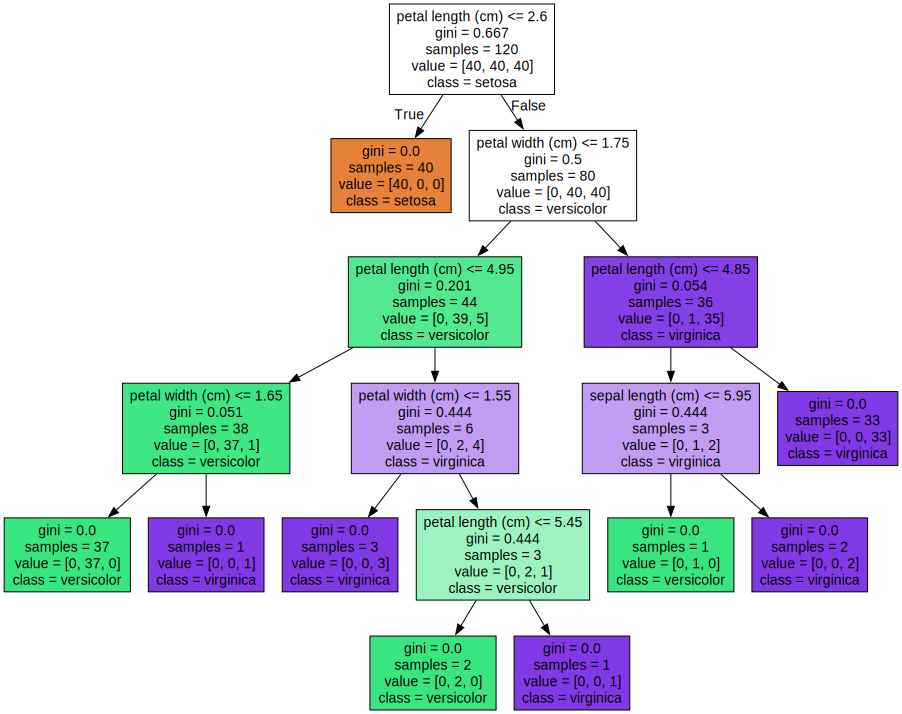

In [6]:
import graphviz
with open('data/tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

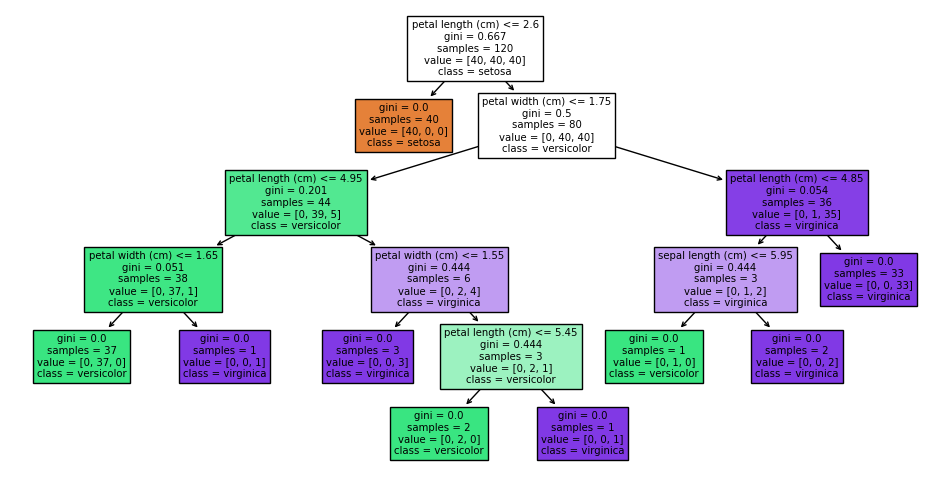

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree( dtc, feature_names=iris.feature_names,
           class_names=iris.target_names.tolist(), filled=True)
plt.show()

- 제약 조건: max_depth = 3

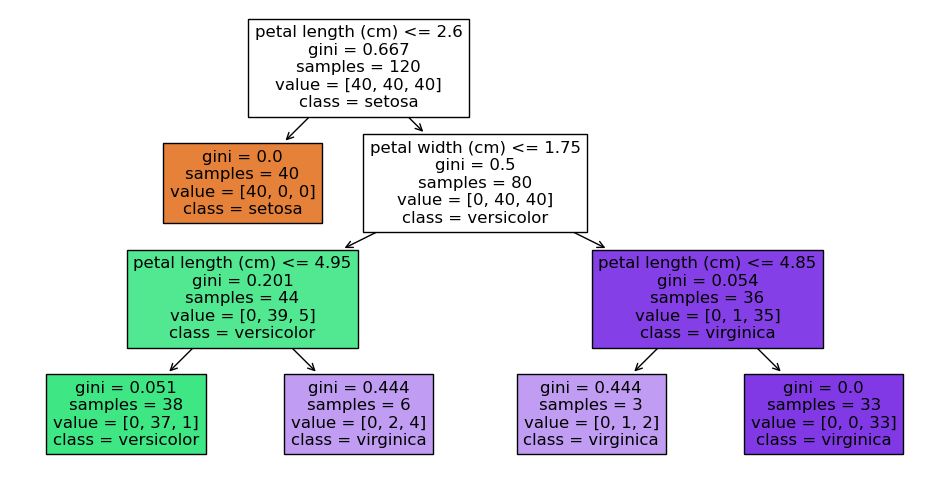

In [11]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree( dtc2, feature_names=iris.feature_names,
           class_names=iris.target_names.tolist(), filled=True)
plt.show()

- 제약 조건: min_samples_split=4
    - samples=4이상이어야 분할됨
    - value [x, y, z] 라고 할때, 두개의 변수가 0이고 나머지 수만 있으면, 단일화과 완료되어 더이상 분류할 필요가 없음

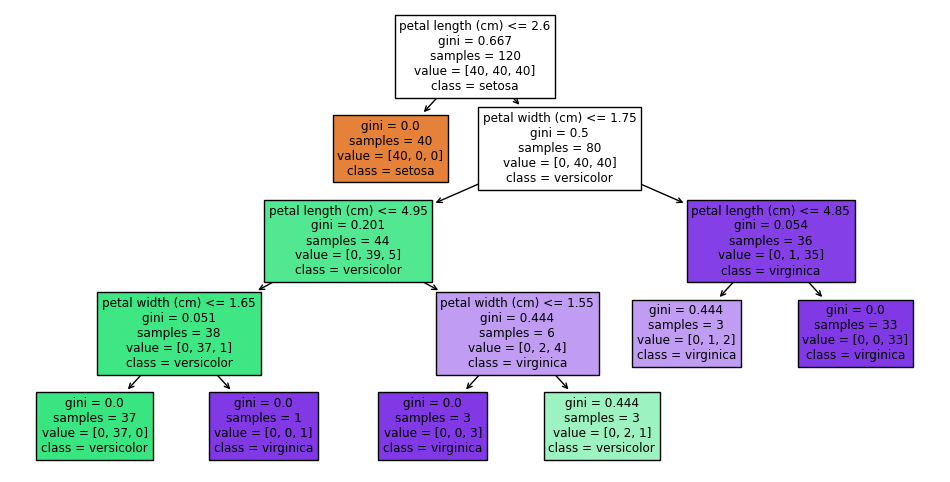

In [12]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree( dtc3, feature_names=iris.feature_names,
           class_names=iris.target_names.tolist(), filled=True)
plt.show()

- 모델 비교

In [14]:
score = dtc.score(X_test, y_test)
score2 = dtc2.score(X_test, y_test)
score3 = dtc3.score(X_test, y_test)
score, score2, score3

(1.0, 1.0, 1.0)

- 모델이 제공하는 정보

In [15]:
dtc.feature_importances_

array([0.01666667, 0.        , 0.57742557, 0.40590776])

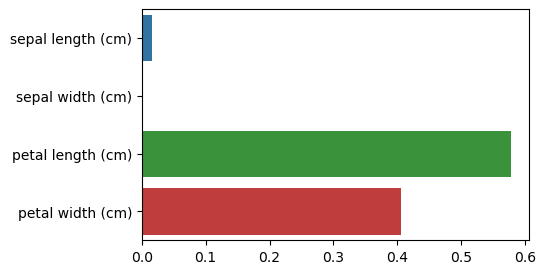

In [16]:
import seaborn as sns

plt.figure(figsize=(5,3))
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()

- 위의 그래프의 의미
    - dtc : 제약조건을 주지 않은 모델
    - petal length > petal width > sepal length > sepal width 순으로 기여함
    - 데이터를 분할할때, 얼마만큼 기여했는지 여부를 알 수 있음.
    - feature_importances = 얼마나 기여했는지, 중요한지 여부 판단

    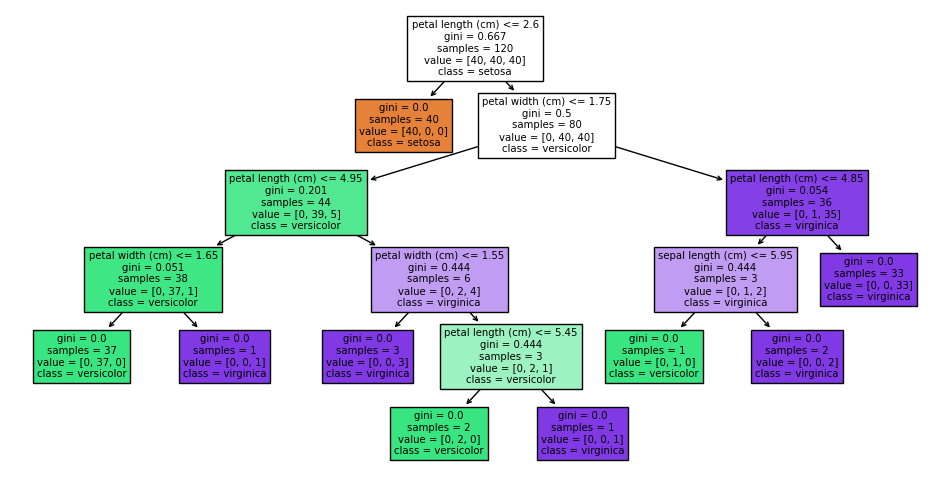

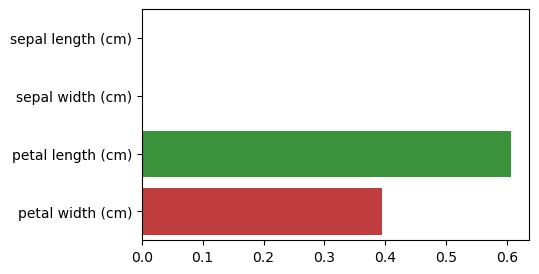

In [17]:
import seaborn as sns

plt.figure(figsize=(5,3))
sns.barplot(x=dtc2.feature_importances_, y=iris.feature_names)
plt.show()

- 위의 그래프의 의미
    - dtc2 : 제약조건을 max_depth=3
    - petal length > petal width > sepal length = sepal width 순으로 기여함
    - sepal length. width는 사용하지 않음

    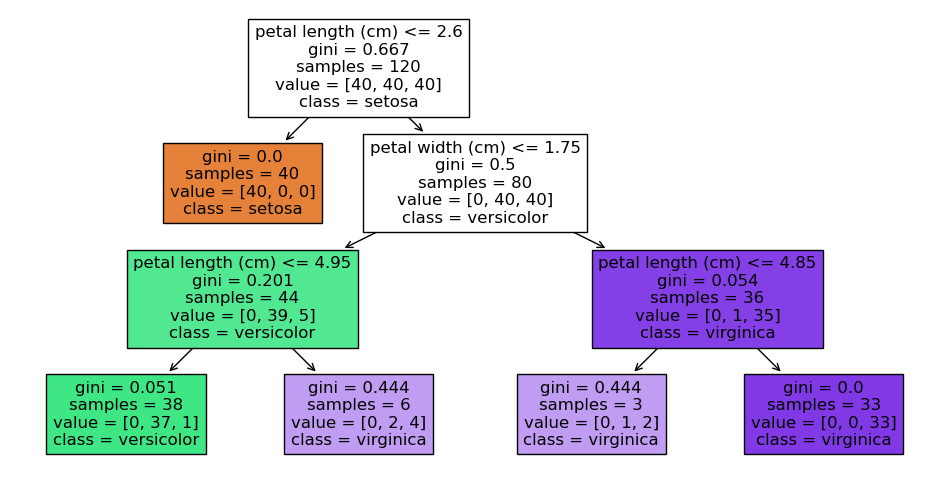